## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Image Loading and Virtualization

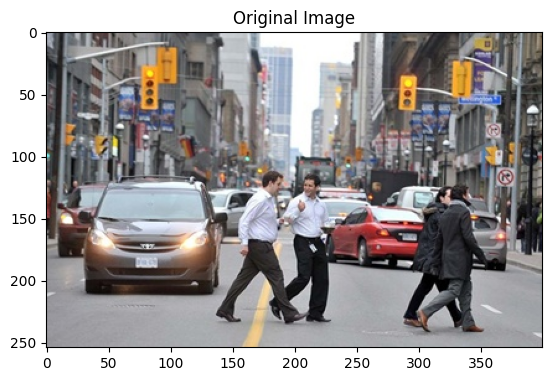

In [2]:
#imread
image_path = 'image/jaywalking.jpg'
image = cv2.imread(image_path)
# Convert image from BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#visualization with matplotlib 
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

## HOGDescriptor

In [3]:
# Create a HOGDescriptor object and initialize it by people or pedestrian detector, then implement object detection
# Initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
# Detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

#after finding picture's people, draw their bounding boxes on the image
# Draw bounding boxes on the original image
image_with_boxes = image_rgb.copy()
for (x, y, w, h) in rects:
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)


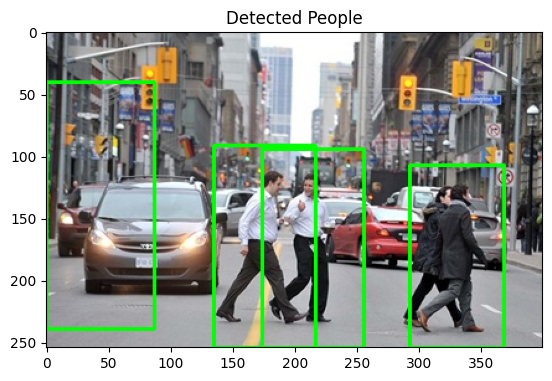

True

In [4]:
#plot and save the output
# Display the image with bounding boxes
plt.imshow(image_with_boxes)
plt.title('Detected People')
plt.show()
# Save the image with bounding boxes
cv2.imwrite('output_detected_people.jpg', cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR))


## Image Compressions and Grayscale

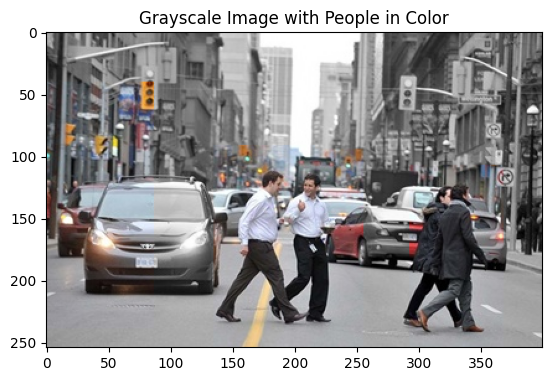

True

In [6]:
#grayscale picture except for the parts where there is a person
# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Convert grayscale image back to RGB
image_gray_rgb = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)
# Mask out the detected people areas from being converted to grayscale
for (x, y, w, h) in rects:
    image_gray_rgb[y:y+h, x:x+w] = image_rgb[y:y+h, x:x+w]

#plot and save the output
# Display the grayscale image with people in color
plt.imshow(image_gray_rgb)
plt.title('Grayscale Image with People in Color')
plt.show()

# Save the grayscale image with people in color
cv2.imwrite('output_grayscale_with_people_color.jpg', cv2.cvtColor(image_gray_rgb, cv2.COLOR_RGB2BGR))


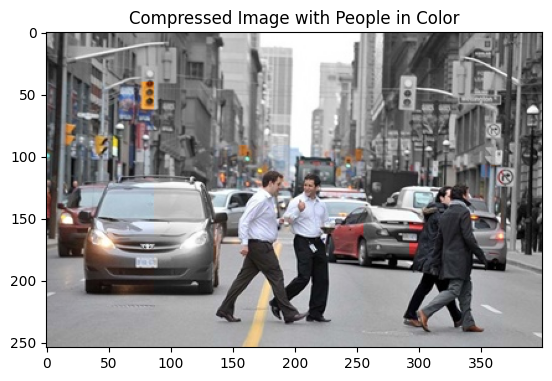

True

In [7]:
#implement huffman or any other image compressions  algorithm on the picture except for the parts where there is a person
# Create a mask for the detected people
mask = np.zeros_like(image_gray, dtype=np.uint8)
for (x, y, w, h) in rects:
    mask[y:y+h, x:x+w] = 255

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Compress only the background (non-people regions)
compressed_bg = cv2.imencode('.png', cv2.bitwise_and(image_gray, image_gray, mask=mask_inv))[1]

# Convert compressed background back to image
compressed_bg_image = cv2.imdecode(np.frombuffer(compressed_bg, np.uint8), cv2.IMREAD_GRAYSCALE)

# Merge compressed background with original people regions
final_image = cv2.bitwise_or(compressed_bg_image, cv2.bitwise_and(image_gray, image_gray, mask=mask))
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_GRAY2RGB)
for (x, y, w, h) in rects:
    final_image_rgb[y:y+h, x:x+w] = image_rgb[y:y+h, x:x+w]
#plot and save the output# Display the compressed image with people in color
plt.imshow(final_image_rgb)
plt.title('Compressed Image with People in Color')
plt.show()

# Save the compressed image with people in color
cv2.imwrite('output_compressed_with_people_color.jpg', cv2.cvtColor(final_image_rgb, cv2.COLOR_RGB2BGR))